In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from concurrent.futures import ThreadPoolExecutor
Init_vac_csv = pd.read_csv('owid-covid-data.csv')

#Loops through USA States on Google open Data by location key and downloads data concurrently 
#Prints error and error code if iteration is failed
def googleDataCall(state):
    try:
        url = f"https://storage.googleapis.com/covid19-open-data/v3/location/US_{state}.csv"
        state_data = pd.read_csv(url)
        return state_data
    except Exception as e:
        print(f"Failed to download data for state: {state}. Error: {e}")

def stateloop():
    states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
#Makes data extraction concurrent instead of simultaneous
    with ThreadPoolExecutor() as executor:
        googleDl = list(executor.map(googleDataCall, states))
    googleData = pd.concat(googleDl, ignore_index=True)
#This is the data filter, removing columns deemed unnecessary 
    unusedColumns = list(googleData.columns[2:7]) + list(googleData.columns[47:65]) + list(googleData.columns[67:75]) + list(googleData.columns[108:614])
    newData = googleData.drop(unusedColumns, axis=1)

    return newData


In [10]:
#data = stateloop()
#print(data)

In [11]:
init_vac_df = pd.DataFrame(Init_vac_csv)

In [12]:
init_vac_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330827,ZWE,Africa,Zimbabwe,2023-07-29,265693.0,NaN,NaN,5712.0,1.0,0.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
330828,ZWE,Africa,Zimbabwe,2023-07-30,265693.0,0.0,0.0,5712.0,0.0,0.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
330829,ZWE,Africa,Zimbabwe,2023-07-31,265693.0,0.0,0.0,5712.0,0.0,0.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
330830,ZWE,Africa,Zimbabwe,2023-08-01,265693.0,0.0,0.0,5712.0,0.0,0.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [13]:
init_vac_df["continent"].unique()

array(['Asia', nan, 'Europe', 'Africa', 'Oceania', 'North America',
       'South America'], dtype=object)

In [14]:
init_vac_df["location"].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',

In [15]:
init_vac_df.loc[init_vac_df["location"]=="United States"]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
311307,USA,North America,United States,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
311308,USA,North America,United States,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
311309,USA,North America,United States,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,-2640.0,-4.2,-4.2,-7.858499
311310,USA,North America,United States,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
311311,USA,North America,United States,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312610,USA,North America,United States,2023-07-29,103436829.0,0.0,0.0,1127152.0,0.0,0.0,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
312611,USA,North America,United States,2023-07-30,103436829.0,0.0,0.0,1127152.0,0.0,0.0,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
312612,USA,North America,United States,2023-07-31,103436829.0,0.0,0.0,1127152.0,0.0,0.0,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
312613,USA,North America,United States,2023-08-01,103436829.0,0.0,0.0,1127152.0,0.0,0.0,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN


In [16]:
usa_vac = init_vac_df.loc[init_vac_df["location"]=="United States"]

In [17]:
birth_vac = usa_vac[["reproduction_rate","people_fully_vaccinated"]]

In [84]:
birth_vac.dropna().transpose()

,311652,311653,311654,311655,311656,311657,311658,311659,311660,311661,...,312393,312394,312395,312396,312397,312398,312399,312400,312401,312402
reproduction_rate,1.07,1.06,1.05,1.04,1.03,1.02,1.0,0.99,0.98,0.96,...,9.700000e-01,9.500000e-01,9.300000e-01,9.400000e-01,9.200000e-01,9.300000e-01,9.300000e-01,9.200000e-01,0.9,8.800000e-01
people_fully_vaccinated,9669.00,9833.00,10161.00,10679.00,11505.00,12831.00,13990.0,14813.00,16487.00,19503.00,...,2.294695e+08,2.294697e+08,2.294798e+08,2.295048e+08,2.295291e+08,2.295533e+08,2.295755e+08,2.295806e+08,229581410.0,2.295931e+08


In [43]:
vaccines = pd.read_csv('usa_covid_vaccine.csv')

In [44]:
vaccines3 = vaccines[["Pfizer-BioNTech original","Pfizer-BioNTech updated booster","Moderna original","Moderna updated booster","J&J/Janssen"]]

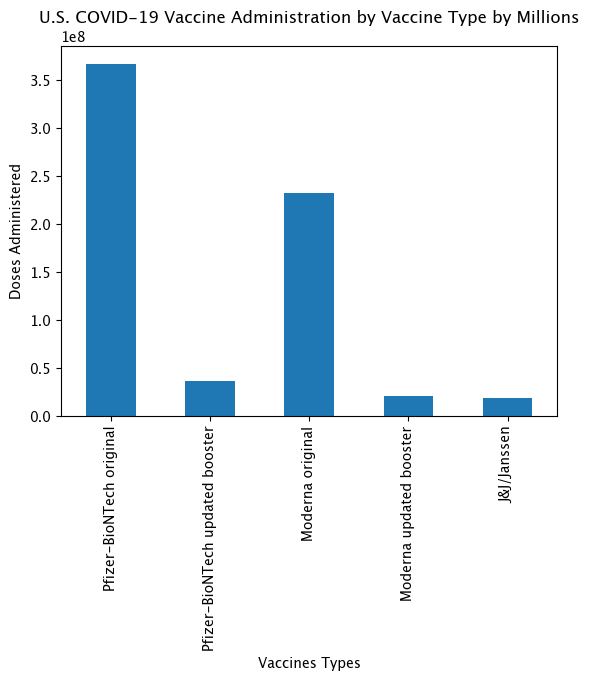

In [83]:
vaccines3.transpose().plot.bar(xlabel = "Vaccines Types", ylabel = "Doses Administered", 
                               title= "U.S. COVID-19 Vaccine Administration by Vaccine Type by Millions",
                              legend = False);


In [51]:
Fertility_rates = pd.read_csv('fertility_rates.csv')